In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob

dataset link below

https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification


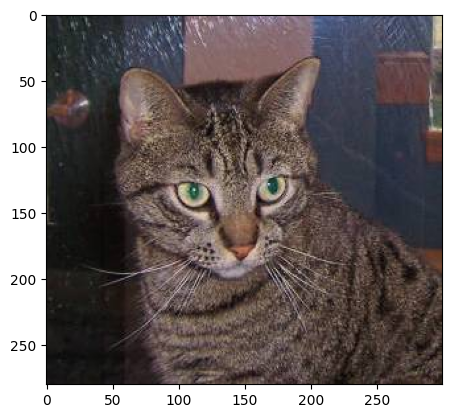

In [40]:
cat1 = plt.imread('/content/drive/MyDrive/top mentor deep learning/30.09.2023/train_data/Cats/cat.1.jpg')
plt.imshow(cat1)

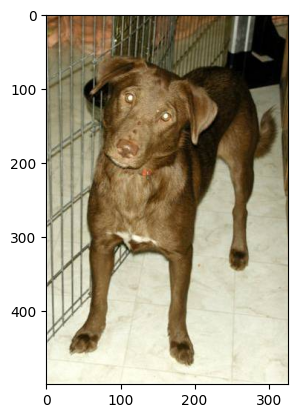

In [41]:
Dog1 = plt.imread('/content/drive/MyDrive/top mentor deep learning/30.09.2023/train_data/Dogs/dog.1.jpg')
plt.imshow(Dog1)

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
data_set_path = '/content/drive/MyDrive/top mentor deep learning/30.09.2023'

In [44]:
train_data_path = '/content/drive/MyDrive/top mentor deep learning/30.09.2023/train_data'

In [45]:
test_data_path = '/content/drive/MyDrive/top mentor deep learning/30.09.2023/test_data'

In [46]:
img_height , img_width = 150,150

In [47]:
from glob import glob
glob('/content/drive/MyDrive/top mentor deep learning/30.09.2023/train_data/*')

['/content/drive/MyDrive/top mentor deep learning/30.09.2023/train_data/Cats',
 '/content/drive/MyDrive/top mentor deep learning/30.09.2023/train_data/Dogs']

In [48]:
glob('/content/drive/MyDrive/top mentor deep learning/30.09.2023/test_data/*')

['/content/drive/MyDrive/top mentor deep learning/30.09.2023/test_data/Cats',
 '/content/drive/MyDrive/top mentor deep learning/30.09.2023/test_data/Dogs']

In [49]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
train_data_preprocessing = ImageDataGenerator(rescale =1./255,
                                              horizontal_flip = True,
                                              shear_range = 0.2,
                                              zoom_range = 0.2)

In [51]:
test_data_preprocessing = ImageDataGenerator(rescale =1./255)

In [52]:
labels = ['Cats','Dogs']

In [53]:
train_data = train_data_preprocessing.flow_from_directory(train_data_path,classes = labels , class_mode ='binary',target_size =(img_height,img_width),batch_size = 8)

Found 1401 images belonging to 2 classes.


In [54]:
test_data = test_data_preprocessing.flow_from_directory(test_data_path,classes=labels,class_mode ='binary',target_size=(img_height,img_width),batch_size = 8)

Found 406 images belonging to 2 classes.


- Develop Custom CNN Architecture

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, sigmoid ,softmax

Building Architecture

In [18]:
from keras.api._v2.keras import activations
model = Sequential()
#1st kernal and maxpool layer
model.add(Conv2D(128,kernel_size=(3,3),padding='same',input_shape =(img_height,img_width,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#2nd kernal and maxpool layer
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#3rd kernal and maxpool layer
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

#4th kernal and maxpool layer
model.add(Conv2D(10,kernel_size=(3,3),padding='same',activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

#Falttern 1D Array layer
model.add(Flatten())

#1D Array data given to ANN
model.add(Dense(32,activation='relu'))#hidden layer-1
model.add(Dense(16,activation = 'relu')) #hidden layer - 2
#model.add(Dense(8,activation = 'relu')) #hidden layer - 3

#output layer
model.add(Dense(1,activation ='sigmoid'))



In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 32)        0

In [57]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics =['Accuracy'])

In [58]:
model.fit(train_data,epochs =50)

Epoch 1/50
176/176 [==============================] - 17s 74ms/step - loss: 0.5143 - Accuracy: 0.7409
Epoch 2/50
176/176 [==============================] - 13s 74ms/step - loss: 0.5051 - Accuracy: 0.7402
Epoch 3/50
176/176 [==============================] - 14s 77ms/step - loss: 0.5025 - Accuracy: 0.7495
Epoch 4/50
176/176 [==============================] - 13s 76ms/step - loss: 0.5001 - Accuracy: 0.7530
Epoch 5/50
176/176 [==============================] - 13s 76ms/step - loss: 0.4931 - Accuracy: 0.7580
Epoch 6/50
176/176 [==============================] - 13s 72ms/step - loss: 0.4802 - Accuracy: 0.7652
Epoch 7/50
176/176 [==============================] - 13s 74ms/step - loss: 0.4786 - Accuracy: 0.7687
Epoch 8/50
176/176 [==============================] - 13s 76ms/step - loss: 0.4629 - Accuracy: 0.7652
Epoch 9/50
176/176 [==============================] - 13s 75ms/step - loss: 0.4687 - Accuracy: 0.7687
Epoch 10/50
176/176 [==============================] - 13s 74ms/step - loss: 0.463

In [59]:
training_loss = model.history.history['loss']

training_loss

[0.5143164396286011,
 0.505065381526947,
 0.5024777054786682,
 0.5001164674758911,
 0.4931308627128601,
 0.4802311062812805,
 0.47862938046455383,
 0.46289244294166565,
 0.4686642587184906,
 0.46307992935180664,
 0.4702076017856598,
 0.45904776453971863,
 0.43020257353782654,
 0.44236987829208374,
 0.4448118805885315,
 0.43786346912384033,
 0.41797327995300293,
 0.4112764596939087,
 0.43039509654045105,
 0.40050554275512695,
 0.3962062895298004,
 0.37754204869270325,
 0.3755360245704651,
 0.3604348599910736,
 0.3757857084274292,
 0.3476031422615051,
 0.3390662968158722,
 0.39199161529541016,
 0.34576937556266785,
 0.33531007170677185,
 0.323466956615448,
 0.3358986973762512,
 0.31212249398231506,
 0.29971757531166077,
 0.2834149897098541,
 0.28147631883621216,
 0.28824663162231445,
 0.2669936418533325,
 0.2619417905807495,
 0.24713487923145294,
 0.2549379765987396,
 0.3013077974319458,
 0.26725560426712036,
 0.2781587839126587,
 0.2552095651626587,
 0.24489031732082367,
 0.251071870326

In [60]:
training_acc = model.history.history['Accuracy']

training_acc

[0.740899384021759,
 0.740185558795929,
 0.7494646906852722,
 0.7530335187911987,
 0.7580299973487854,
 0.7651677131652832,
 0.7687366008758545,
 0.7651677131652832,
 0.7687366008758545,
 0.7758743762969971,
 0.7680228352546692,
 0.7865810394287109,
 0.8058529496192932,
 0.7787294983863831,
 0.7894361019134521,
 0.8015702962875366,
 0.8058529496192932,
 0.8015702962875366,
 0.7858672142028809,
 0.821556031703949,
 0.8272662162780762,
 0.824411153793335,
 0.840114176273346,
 0.8286938071250916,
 0.821556031703949,
 0.835117757320404,
 0.8429692983627319,
 0.8229835629463196,
 0.8472519516944885,
 0.8501070737838745,
 0.8558172583580017,
 0.8665239214897156,
 0.8708065748214722,
 0.8722341060638428,
 0.8815131783485413,
 0.897216260433197,
 0.8758029937744141,
 0.8900785446166992,
 0.8793718814849854,
 0.897216260433197,
 0.8900785446166992,
 0.8815131783485413,
 0.8850820660591125,
 0.8800856471061707,
 0.8957887291908264,
 0.900071382522583,
 0.8979300260543823,
 0.9114918112754822,
 0

EDA for Model validation

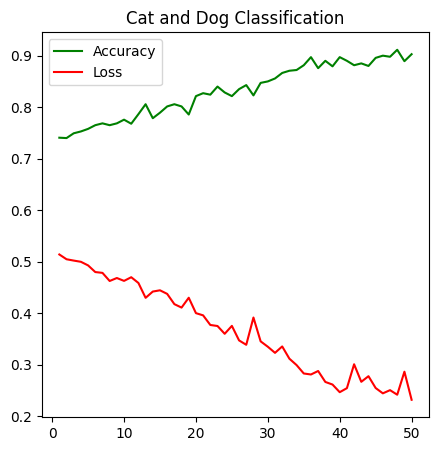

In [61]:
plt.figure(figsize= (5,5))
plt.plot(np.arange(1,51),training_acc,color ='g',label = 'Accuracy')
plt.plot(np.arange(1,51),training_loss, color = 'r',label = 'Loss')
plt.title('Cat and Dog Classification')
plt.legend(loc=0)
plt.show()

# Now downloading the 2 cat and 2 dog images from the internet and checking with the developed model

[[[126 129 136]
  [127 130 137]
  [127 130 137]
  ...
  [118 118 118]
  [118 118 118]
  [118 118 118]]

 [[126 129 136]
  [126 129 136]
  [127 130 137]
  ...
  [117 117 117]
  [117 117 117]
  [117 117 117]]

 [[125 128 135]
  [126 129 136]
  [126 129 136]
  ...
  [116 116 116]
  [116 116 116]
  [116 116 116]]

 ...

 [[193 189 178]
  [192 188 177]
  [192 188 177]
  ...
  [ 41  48  58]
  [ 41  48  54]
  [ 41  48  54]]

 [[194 190 179]
  [193 189 178]
  [193 189 178]
  ...
  [ 43  49  61]
  [ 43  50  60]
  [ 43  50  60]]

 [[195 191 180]
  [194 190 179]
  [193 189 178]
  ...
  [ 43  51  64]
  [ 43  51  62]
  [ 43  51  62]]]
(183, 275, 3)


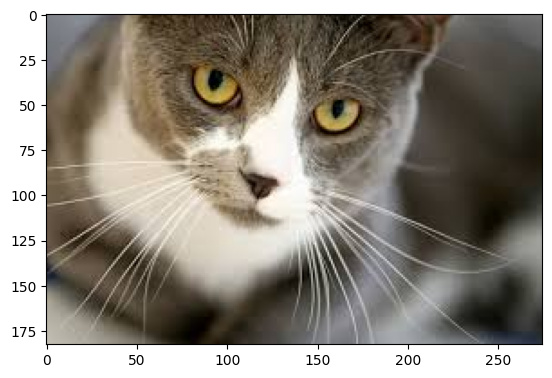

In [62]:
import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Download /images (1) (3).jpeg.jpg')
print(img)
print(img.shape)
plt.imshow(img)

In [63]:
import cv2

In [64]:
def pred(path):
  image = plt.imread(path)
  print(image.shape)

  image = cv2.resize(image,(150,150)) #resizing the image using cv2
  print(image.shape)

  image = np.array(image)/255.0 #rescaling the image as done with training data

# Now we need to make sure convert data into Deep learning CNN trained Manner
  image = np.expand_dims(image,axis = 0) #expanding dimension
  print(image.shape)

  result =model.predict(image)
  print(result)

  if  result [0][0] > 0.5:
    print('The Prediction is = Dog')
  else:
    print('The Prediction is = Cat')
  img = plt.imread(path)
  plt.imshow(img)

(1080, 1920, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 91ms/step
[[0.9999455]]
The Prediction is = Dog


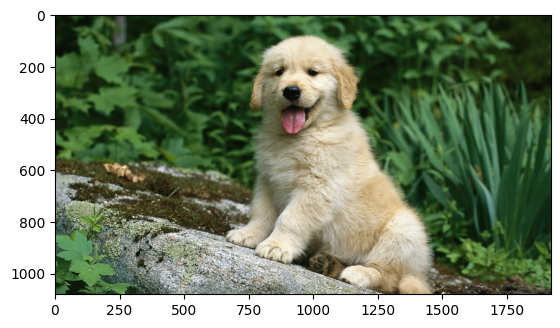

In [65]:
pred('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Download /Floppy.jpg')

(183, 275, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 20ms/step
[[0.12413954]]
The Prediction is = Cat


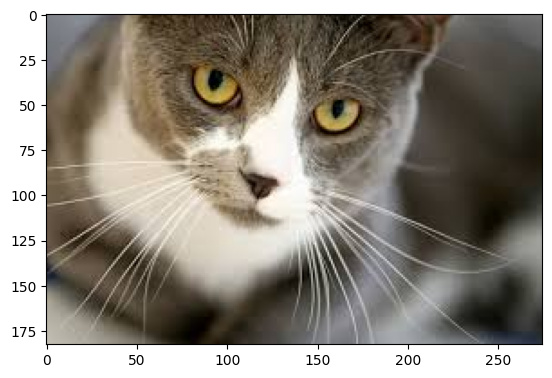

In [66]:
pred('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Download /images (1) (3).jpeg.jpg')

(183, 275, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 19ms/step
[[0.97504914]]
The Prediction is = Dog


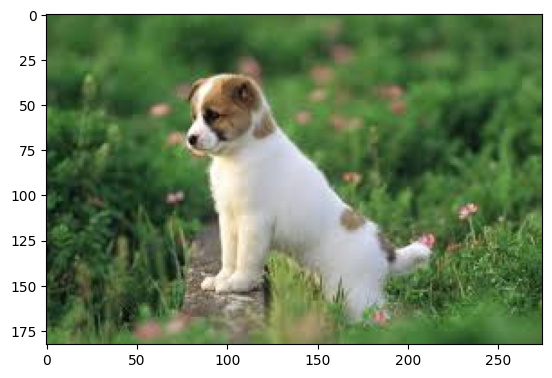

In [67]:
pred('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Download /dog (3) (4).jpeg.jpg')

(175, 287, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 18ms/step
[[0.04424402]]
The Prediction is = Cat


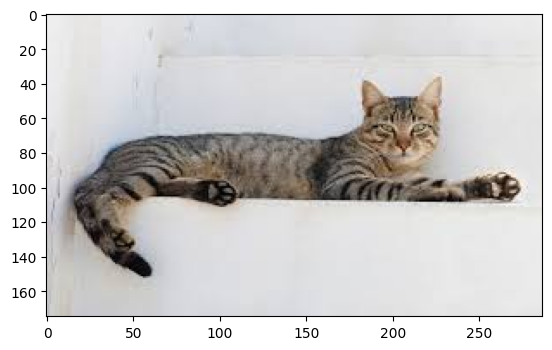

In [72]:
pred('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Download /images (1) (2).jpeg.jpg')

(180, 320, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 51ms/step
[[0.86646456]]
The Prediction is = Dog


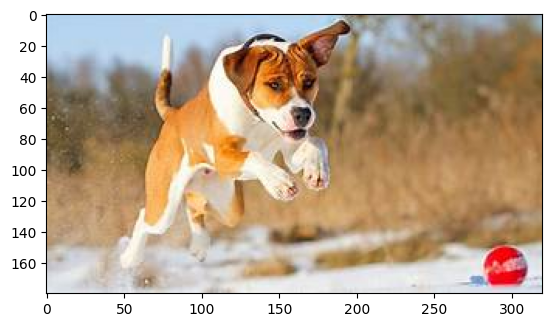

In [76]:
pred('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Download /Dog.jpeg')

(1280, 1225, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 18ms/step
[[0.10107019]]
The Prediction is = Cat


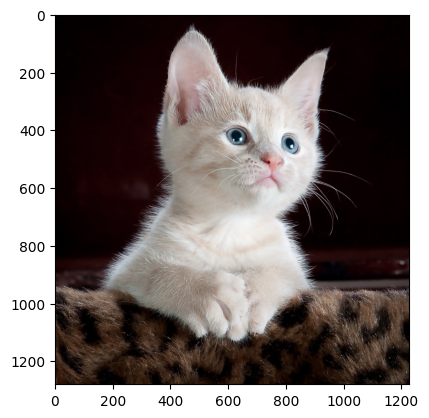

In [70]:
pred('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Download /cat-551554_1280.jpg')

(121, 121, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 26ms/step
[[0.01960978]]
The Prediction is = Cat


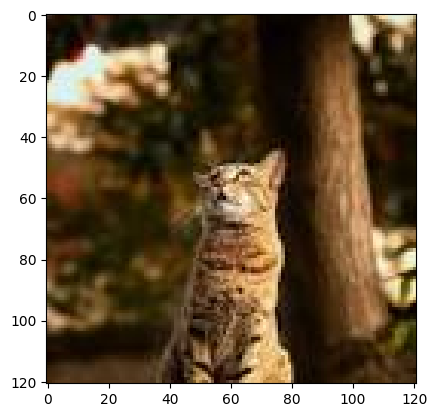

In [74]:
pred('/content/drive/MyDrive/top mentor deep learning/30.09.2023/Download /Cat.jpeg')